# Atividade 2 EQ024: Tecnologia em Fluidização

## Aluno: João Eduardo Levandoski

In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

### Gerador de distribuição aleatória, baseada na curva normal

In [15]:
numero_peneiras = 6
razao = (2)**(1/4)
abertura_1_penei = 5000 #microns
media_dia = 3500 #microns
massa_total = 5680 #gramas
var = 0.3

In [16]:
dist_norm = []
for _ in range(massa_total):
    dist_norm.append(random.normalvariate(media_dia, media_dia*var))

## Classificação

In [17]:
penei = {}
bins = []
for j in range(numero_peneiras+1):
    lista =[]
    for i in dist_norm:
        if abertura_1_penei*razao/((j+1)*razao) > i >= abertura_1_penei*razao/((j+2)*razao):
            lista.append(i)
    bins.append(abertura_1_penei*razao/((j+1)*razao))
        
    penei.update({str( abertura_1_penei*razao/((j+1)*razao)): lista})
bins = bins[::-1]

In [18]:
x = []
y = []
for nome in penei:
    x.append(np.median(penei[nome]))
    y.append(len(penei[nome]))
x = np.asarray(x[::-1])
y = np.asarray(y[::-1])

### Plot da distribuição

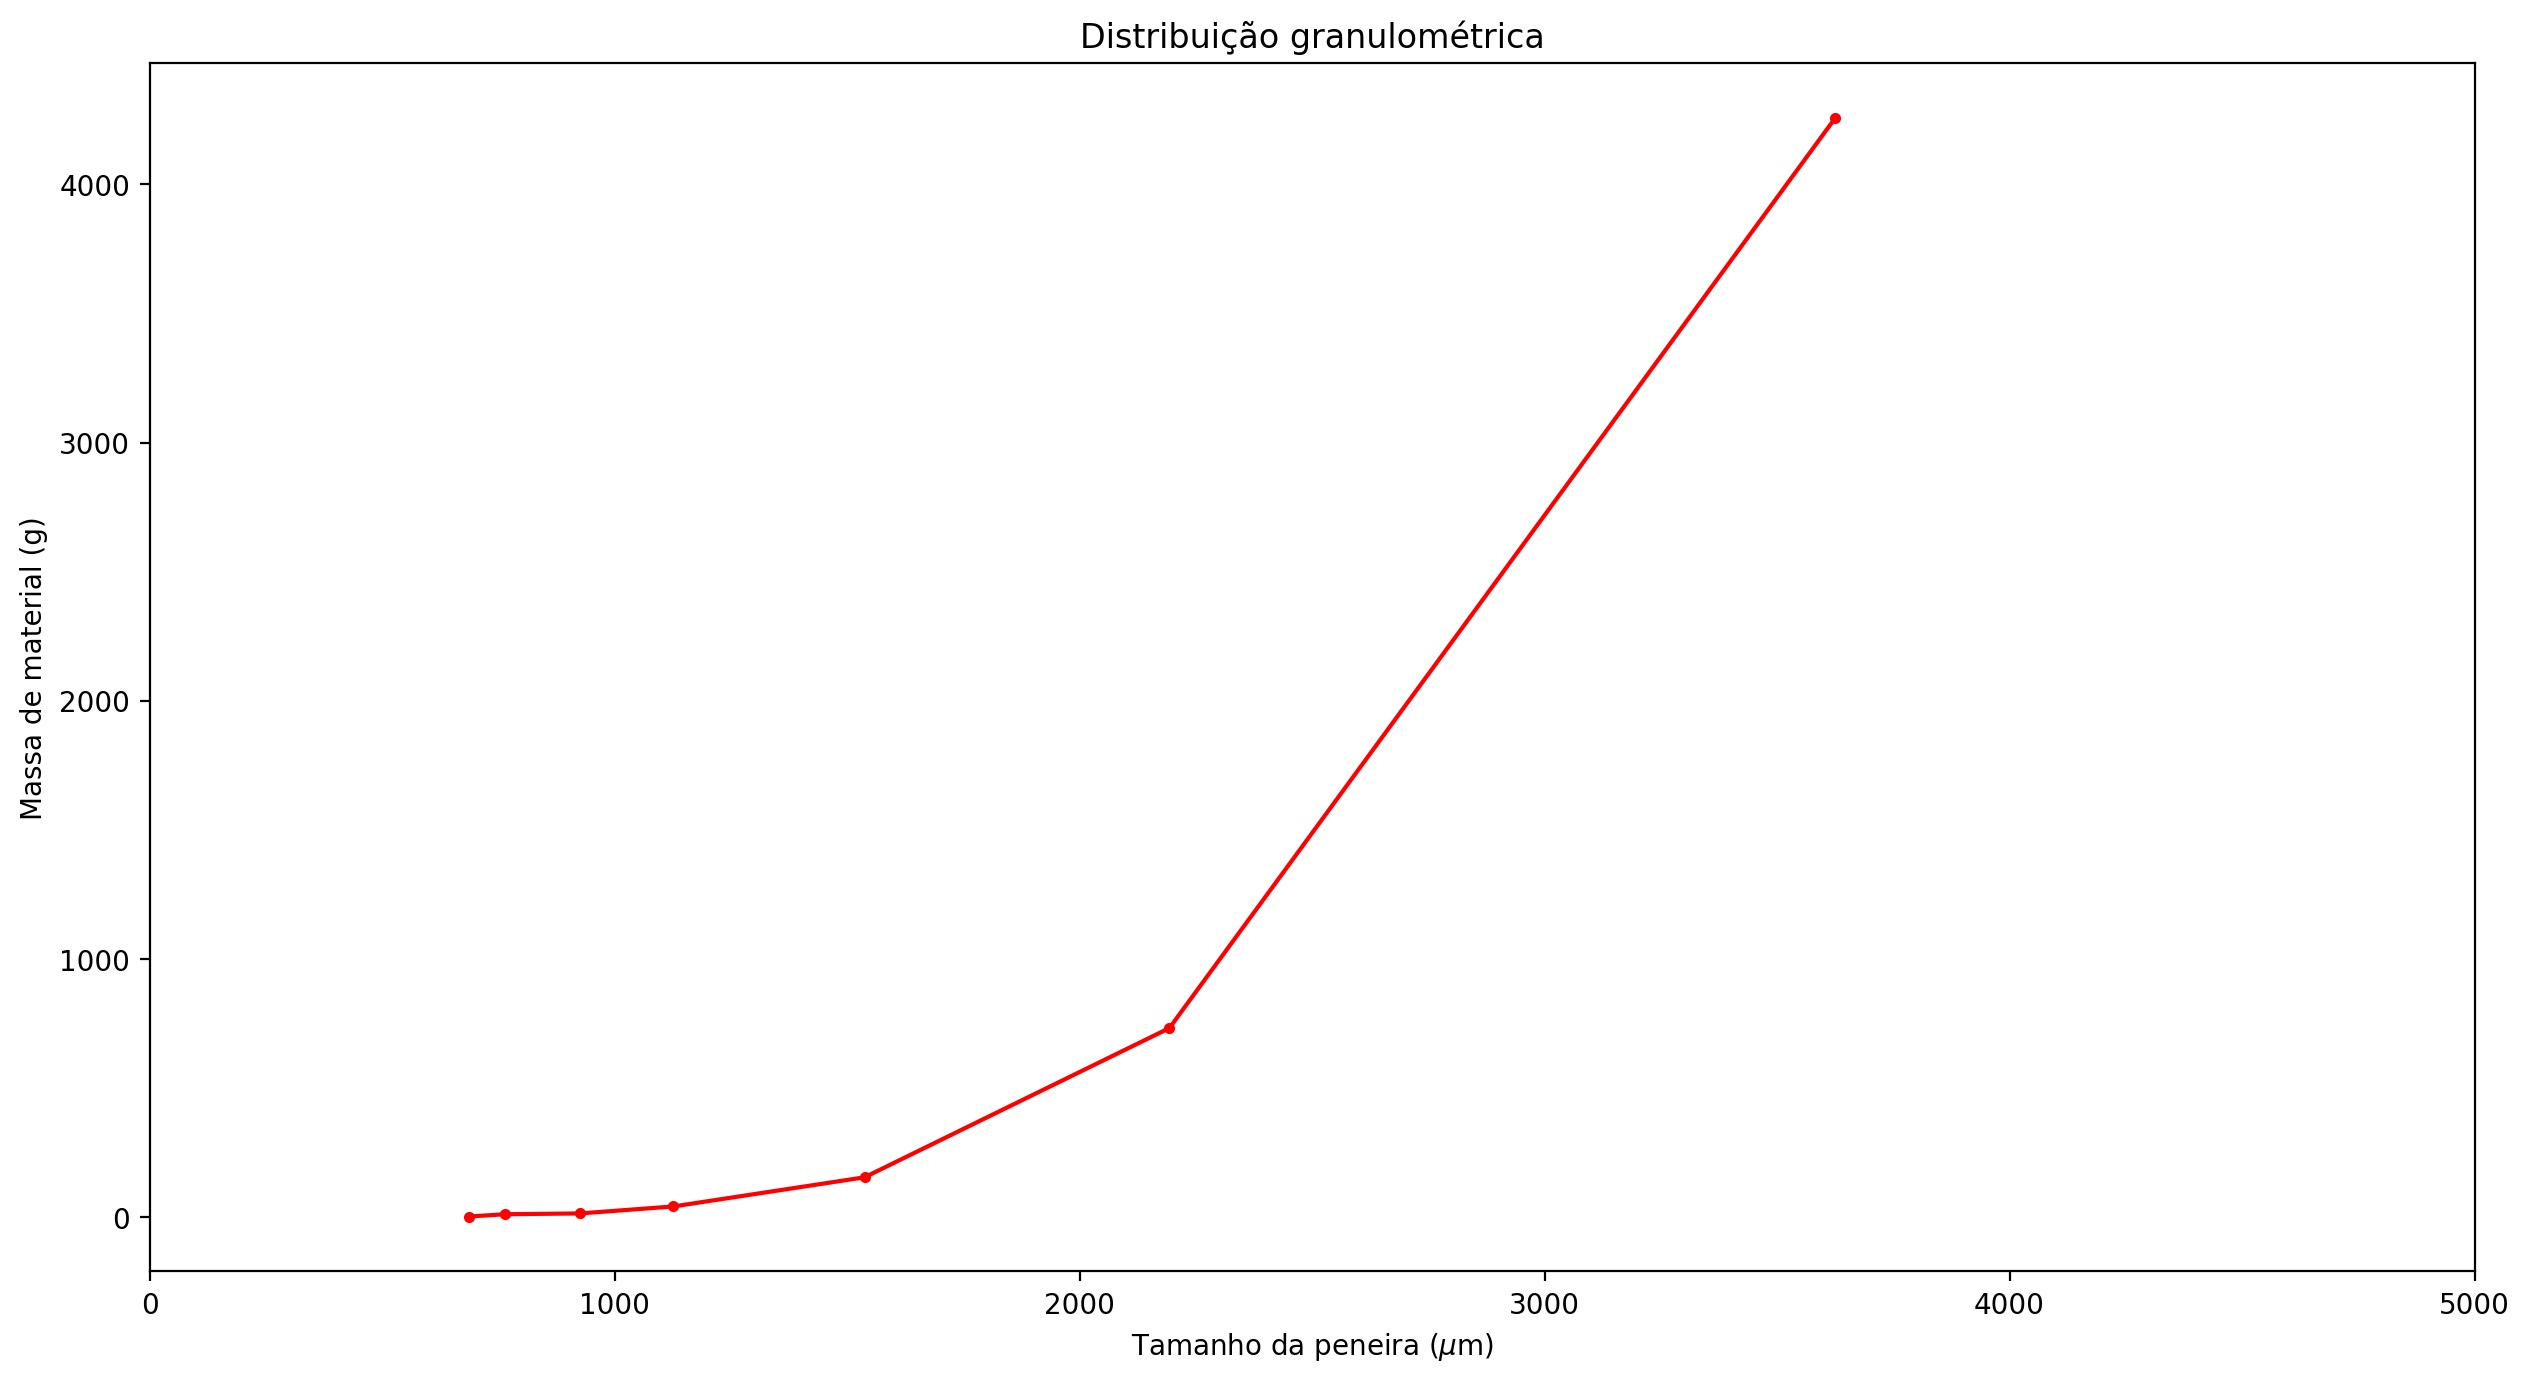

In [19]:
fig = plt.figure(figsize=(15,8), dpi=200)
plt.plot(x, y, marker='.', color='red')
plt.xlim((math.ceil(0), math.floor(abertura_1_penei)))
plt.title('Distribuição granulométrica')
plt.xlabel('Tamanho da peneira ($\mu$m)')
plt.ylabel('Massa de material (g)')
plt.show()

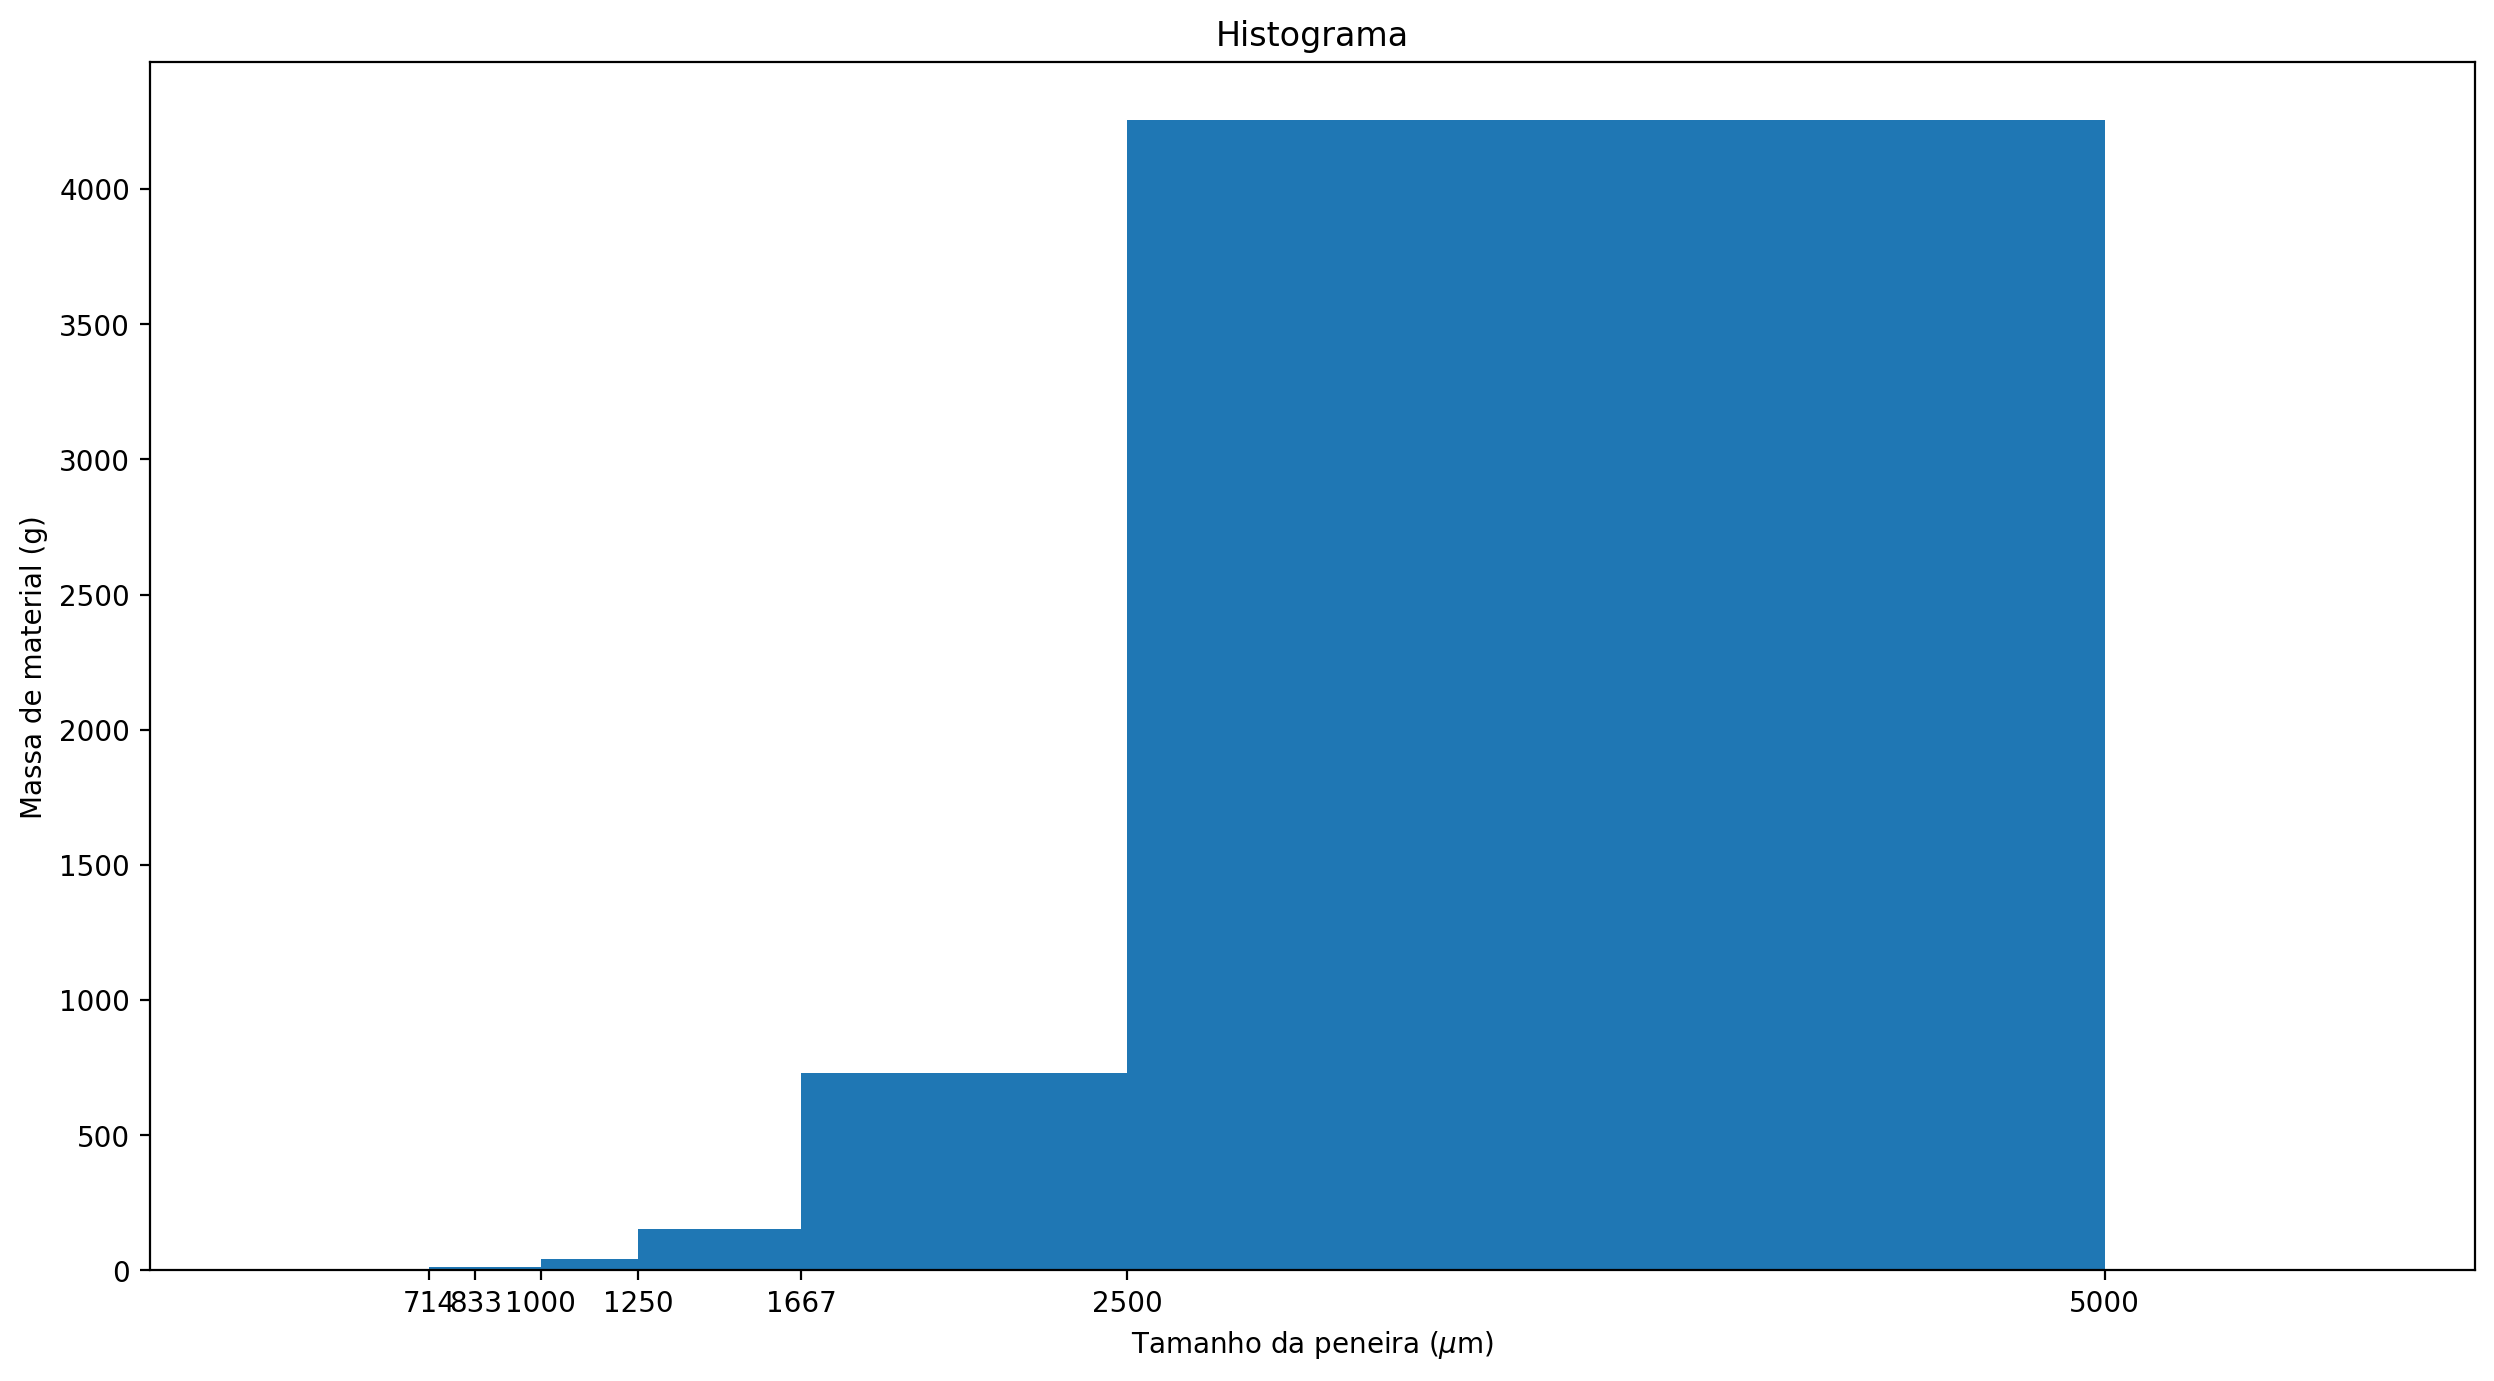

In [20]:
fig = plt.figure(figsize=(15,8), dpi=200)
plt.xlim((math.ceil(0), math.floor(abertura_1_penei*razao)))
plt.xticks(bins)
ax = plt.hist(dist_norm, bins=bins)
plt.title('Histograma')
plt.xlabel('Tamanho da peneira ($\mu$m)')
plt.ylabel('Massa de material (g)')
plt.show()

### Plot ddo histograma da distribuição, baseado no número de peneiras escolhidas

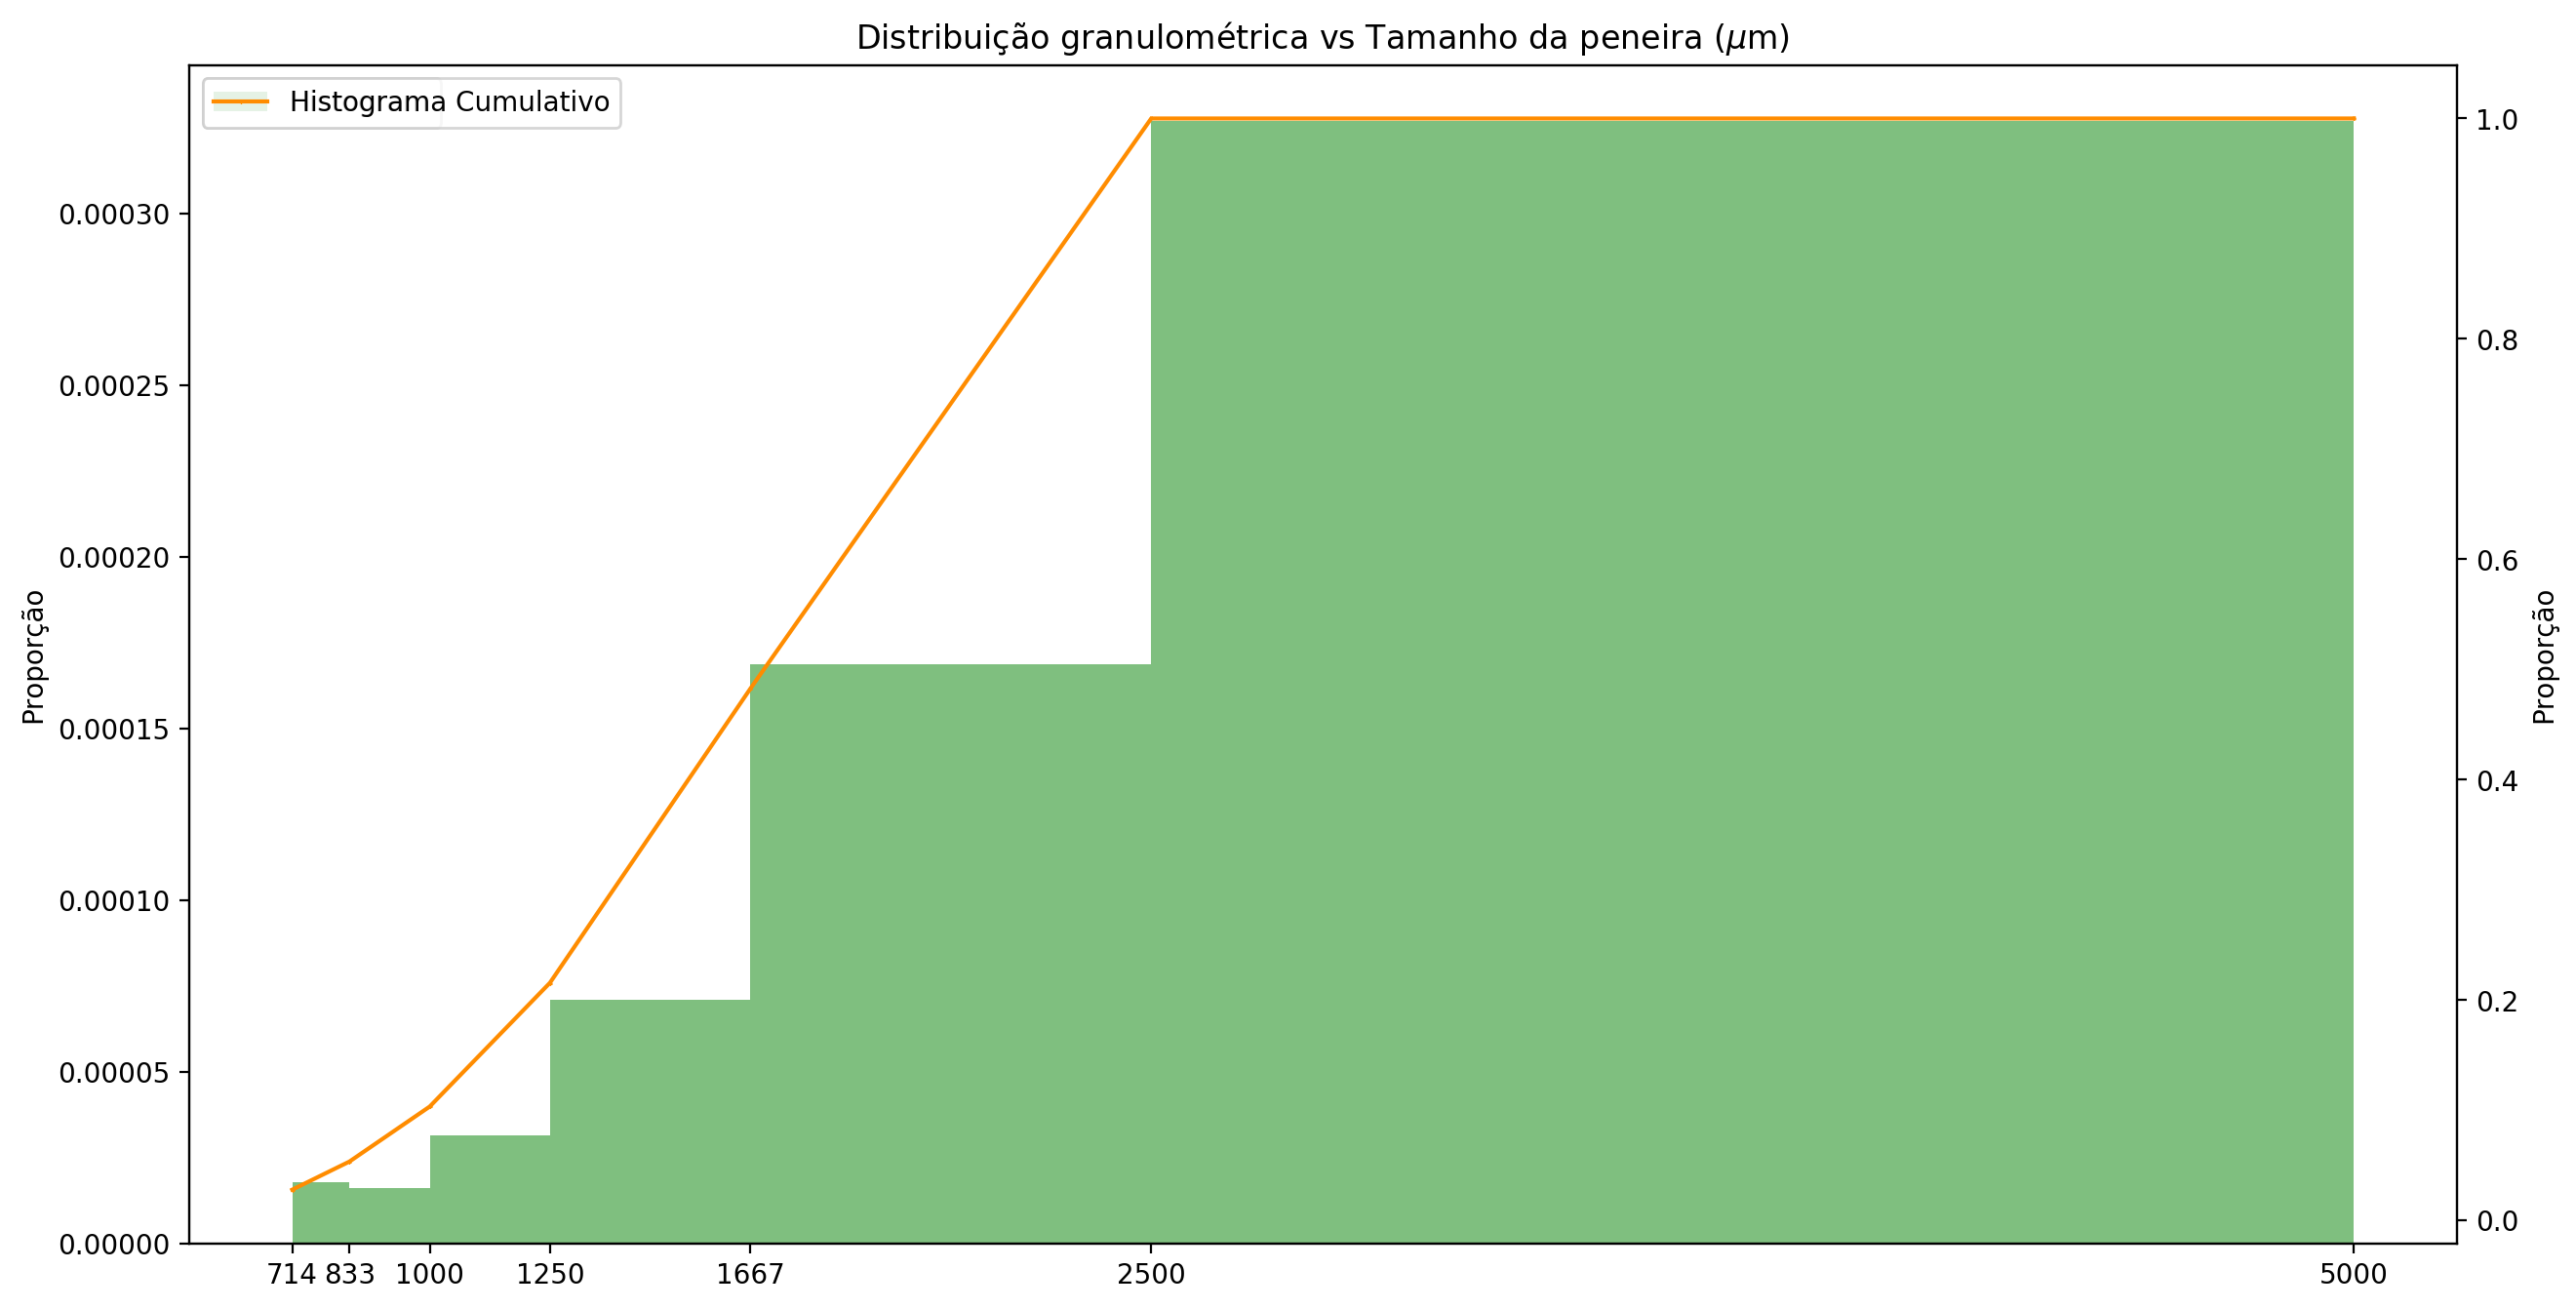

In [21]:
fig = plt.figure(figsize=(15,8), dpi=200)
ax = plt.axes()
plt.ylabel("Proporção")
values, base, _ = plt.hist(dist_norm, bins = bins, density=True,
                           alpha = 0.5, color = "green",
                           range = range, label = "Histogram")
ax_bis = ax.twinx()
values = np.append(values,0)
ax_bis.plot(base, np.cumsum(values)/ np.cumsum(values)[-1],
            color='darkorange', marker='*', linestyle='-',
            markersize = 1, label = "Histograma Cumulativo" )
plt.title('Distribuição granulométrica vs Tamanho da peneira ($\mu$m)')
plt.xlabel('Tamanho da peneira ($\mu$m)')
plt.ylabel('Proporção')
plt.xticks(bins)
ax_bis.legend();
ax.legend();
plt.show()

### Cálculo do diâmetro de Sauter

In [22]:
di = np.asarray(x)
frac = y/massa_total

In [23]:
soma = 0
for i in range(len(di)):
    soma+= (frac[i]/di[i])

In [24]:
d_sauter = 1/soma
d_sauter

3387.06500058574

In [25]:
X = np.cumsum(values)/ np.cumsum(values)[-1]
di = di

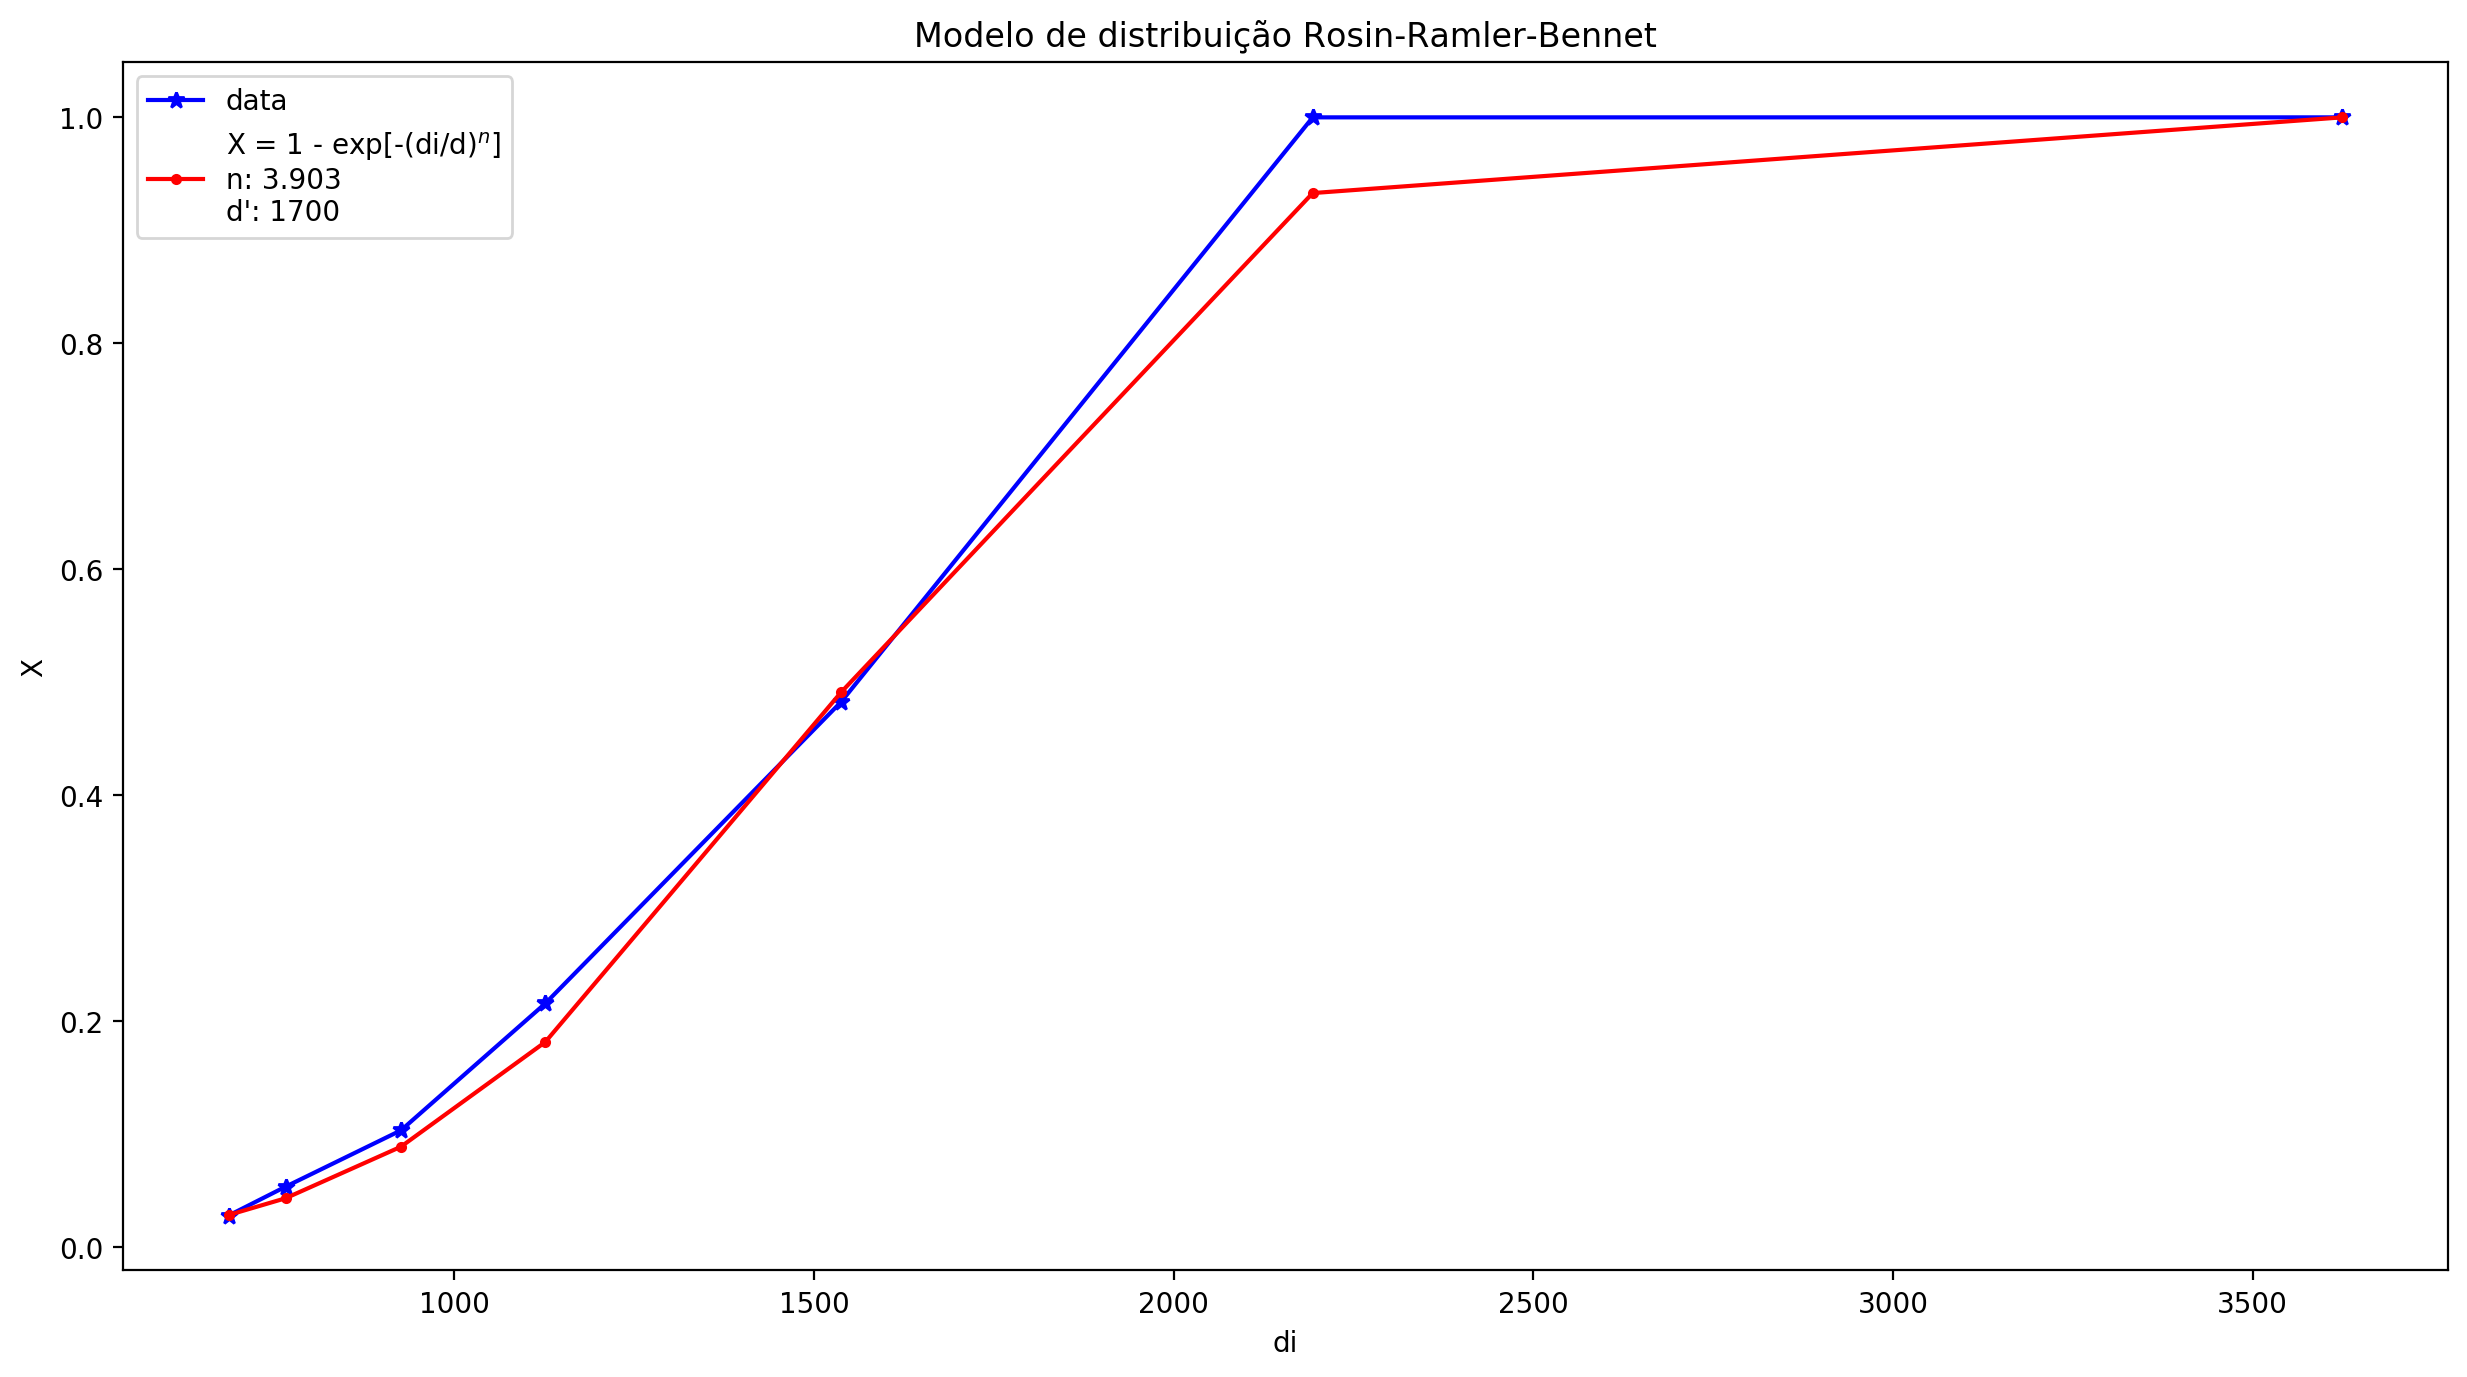

In [30]:
def func(x, b):
    a = 1700
    return 1 - np.exp(-(x/a)**b)

xdata = di
ydata = X
fig = plt.figure(figsize=(15,8), dpi=200)

plt.plot(xdata, ydata, 'b-', label='data', color='blue', marker='*')
popt, _ = curve_fit(func, xdata, ydata)

ax = plt.plot(xdata, func(xdata, *popt), 'r-',
         label=f"X = 1 - exp[-(di/d)$^n$]\nn: {popt[0]:5.4}\nd': 1700",
         color='red', marker='.')

plt.title('Modelo de distribuição Rosin-Ramler-Bennet')
plt.xlabel('di')
plt.ylabel('X')
plt.legend()
plt.show()